[*********************100%***********************]  3 of 3 completed


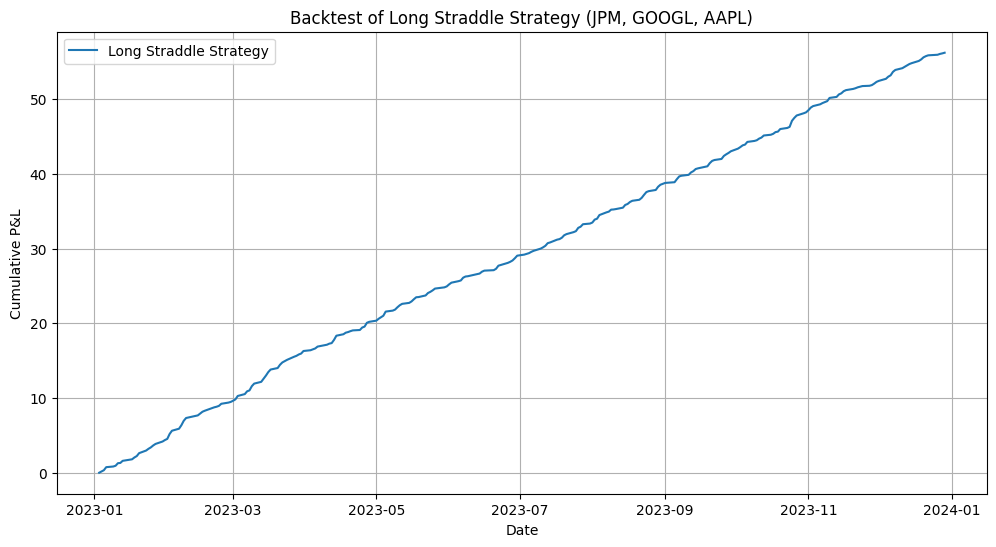

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define securities and date range
stocks = ["JPM", "GOOGL", "AAPL"]
start_date = "2023-01-01"
end_date = "2024-01-01"

# Fetch stock price data
prices = yf.download(stocks, start=start_date, end=end_date)["Close"]

# Simulate ATM Straddle Prices (Approximated with 5% premium for Calls and Puts)
straddle_costs = prices * 0.05  # Assume 5% of stock price per leg (call & put)

# Simulate Straddle Payoff
returns = prices.pct_change().fillna(0)
straddle_returns = np.abs(returns)  # Straddle benefits from volatility
portfolio_returns = (straddle_returns * straddle_costs.shift(1)).sum(axis=1)  # Portfolio P&L

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns.cumsum(), label='Long Straddle Strategy')
plt.title("Backtest of Long Straddle Strategy (JPM, GOOGL, AAPL)")
plt.xlabel("Date")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.grid()
plt.show()
